# [3920] Homework 5 - Multi-model
Data file: https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/liver_cirrhosis_stage_10K.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 2:30 PM on the due date
  * No late submission will be accepted
* You must submit a cleanly executed notebook (*.ipynb)
  * Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 5 Requirements
* Load data
  * Do NOT use meaningless columns (e.g. 'Patient_ID') as independent variables
* Examine data
  * Display (e.g. bar chart) class distribution of target variable (Disease_Stage)
* Prepare data for model training
  * Perform the following data preparation steps
    * Handle missing values
    * Variable encoding
    * Feature scaling
  * Do not delete any rows
  * Do not drop any columns, EXCEPT when performing variable encoding
* Display a sample of 20 rows of the final set of independent variables used for all the model trainings
* Train logistic regression model
  * Must modify at least 2 hyperparameters (not including random_state)
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
  * Calculate and display model accuracy
* Train the following classification models (KNN, Random Forest & SVC).  For the SVC model, you can use any SVC classifier.  Perform the following for each model:
  * Must modify at least 2 hyperparameters (not including random_state) in each model
    * You can modify as many hyperparameters as desired
      * **NOTE: The objective of changing these hyperparameters is for each model's accuracy to exceed 80%**
      * The hyperparameter values you set CANNOT be the same as the default value
    * If you used hyperparameter random_state in your Logistic Regression model training, use the same value when training the other models
    * Do NOT re-split training and test sets when training the other models
  * Calculate and display this model's accuracy
    * **NOTE: For each of these 3 classification models, model accuracy MUST exceed 80%**
* Display (e.g. bar chart) model accuracy for all 4 models

#### NOTES
- You must TRY to resolve all errors and warnings
- You may set random_state hyperparameter to control the accuracy output

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 06/10/25 20:40:26


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add other imports as needed
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load data

Liver Cirrhosis Stage Classification

Context
> Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.

Data source
> Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

> **NOTE: The professor has modified this dataset for the purposes of this assignment.  You must use this modified dataset for this homework.**

Features
* N_Days : # days between registration and the earlier of death, transplantation, or study analysis time in 1986
* Status : patient status - values = C (censored), CL (censored due to liver tx), or D (death)
* Drug : type of drug given (D-penicillamine) or placebo
* Age : patient age (days)
* Gender : M (male) or F (female)
* Ascites : presence of ascites N (No) or Y (Yes)
* Hepatomegaly : presence of hepatomegaly N (No) or Y (Yes)
* Spiders : presence of spiders N (No) or Y (Yes)
* Edema : presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
* Bilirubin : serum bilirubin in [mg/dl]
* Cholesterol : serum cholesterol in [mg/dl]
* Albumin : albumin in [gm/dl]
* Copper : urine copper in [ug/day]
* Alk_Phos : alkaline phosphatase in [U/liter]
* SGOT : serum glutamic-oxaloacetic transaminase, an enzyme level indicating liver health in [U/ml]
* Tryglicerides : triglicerides in [mg/dl]
* Platelets : platelets per cubic [ml/1000]
* Prothrombin : prothrombin time in seconds [s]
* Patient_ID : patient ID

Target variable to predict:
* Disease_Stage: stage_1, stage_2, stage_3

In [3]:
# Read data from file (liver_cirrhosis_stage_10K.csv) into dataframe
#  NOTES:
#   Field separator is ';'
#   Use column 'Patient_ID' as index_col
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/liver_cirrhosis_stage_10K.csv', sep=';', index_col='Patient_ID')

In [4]:
# Setting a seed that will be used for testing purposes
SEED = 645

### Examine data

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# Review dataframe shape
df.shape

(10000, 19)

In [7]:
# Display a sample of 5 rows from dataframe
df.sample(5)

,N_Days,Status,Drug,Age,Gender,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Disease_Stage
Patient_ID,,,,,,,,,,,,,,,,,,,
18396,3244.0,D,D-penicillamine,24101.0,F,N,N,N,N,3.3,383.000000,3.53,102.0,1234.0,137.95,87.000000,283.0,9.8,stage_2
10314,77.0,D,Placebo,20819.0,F,Y,Y,Y,S,21.6,175.000000,3.31,221.0,3697.4,101.91,168.000000,80.0,12.0,stage_3
14701,1558.0,C,Placebo,24107.0,F,Y,N,Y,N,2.2,328.000000,3.46,75.0,1677.0,87.00,116.000000,150.0,11.1,stage_3
7074,3839.0,D,Placebo,16467.0,F,N,Y,N,N,4.7,296.000000,3.44,114.0,9933.2,206.40,101.000000,151.0,10.5,stage_2
12570,4453.0,C,D-penicillamine,16279.0,F,N,Y,Y,N,2.1,369.510563,3.54,122.0,8778.0,56.76,124.702128,79.0,10.3,stage_3


### Display bar chart showing class distribution for target variable (Disease_Stage)

In [8]:
# Display class distribution counts
df['Disease_Stage'].value_counts()

Disease_Stage
stage_2    3416
stage_1    3307
stage_3    3277
Name: count, dtype: int64

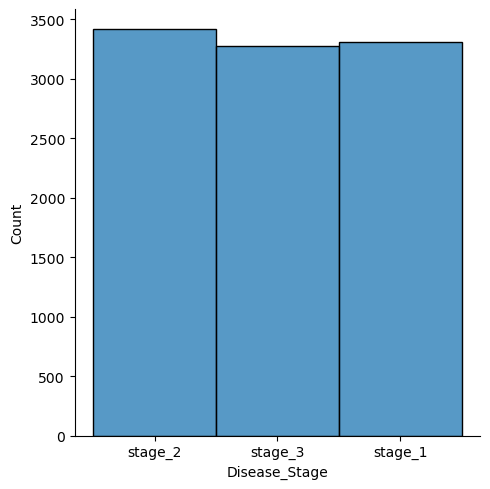

In [9]:
# Display bar chart showing class distribution
sns.displot(df['Disease_Stage'])

### Prepare data for model training
* Do not delete any rows
* Do not drop any columns, EXCEPT when performing variable encoding

#### Check for missing values

In [10]:
df.isna().sum()

N_Days            18
Status           107
Drug               0
Age               25
Gender            44
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Disease_Stage      0
dtype: int64

#### Use the SimpleImputer to replace missing values

In [11]:
# For categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')

# For continous columns
mean_imputer = SimpleImputer(strategy='mean')

In [12]:
# Categorical columns
replace_null_FREQ = ['Status', 'Gender']

# Continous columns
replace_null_MEAN = ['N_Days', 'Age',]

In [13]:
# Replace categorical nulls with most frequent category in respective column
df[replace_null_FREQ] = freq_imputer.fit_transform(df[replace_null_FREQ])

# Repalce continous nulls with mean in respective column
df[replace_null_MEAN] = mean_imputer.fit_transform(df[replace_null_MEAN])

#### Check for missing values again

In [14]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Gender           0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Disease_Stage    0
dtype: int64

### Perform one-hot encoding

In [15]:
# Columns to OneHot encode
one_hot_cols = ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Spiders', 'Status']

In [16]:
df = pd.get_dummies(df, columns=one_hot_cols)

### Perform label encoding

In [17]:
label_cols = ['Edema']

In [18]:
label_encoder = LabelEncoder()
df[label_cols] = df[label_cols].apply(label_encoder.fit_transform)

### Separate independent and dependent variables
* Independent variables: All variables EXCEPT Disease_Stage
* Dependent variable: Disease_Stage

In [19]:
x = df.drop('Disease_Stage', axis=1)
y = df['Disease_Stage']

#### Standardize the data

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

### Display a sample of 20 rows of the final set of independent variables used for all the model trainings

In [21]:
x_scaled.sample(20)

,N_Days,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_D-penicillamine,Drug_Placebo,Gender_F,Gender_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Status_C,Status_CL,Status_D
1263,1.798718,-0.042511,-0.447602,-0.548008,-0.489266,0.302152,-0.626749,1.308298,-0.503104,0.393338,0.094318,0.293203,1.322694,-1.322694,0.355321,-0.355321,0.697529,-0.697529,0.796904,-0.796904,0.917029,-0.917029,-1.112041,-0.289441,1.305436
4540,0.647584,-1.252478,-0.447602,-0.484463,-0.584510,-0.326099,-0.777881,-0.510969,-0.341303,-0.962500,0.124704,-0.149307,1.322694,-1.322694,0.355321,-0.355321,0.697529,-0.697529,-1.254857,1.254857,0.917029,-0.917029,-1.112041,-0.289441,1.305436
3714,-1.047471,0.322379,-0.447602,-0.039646,-0.865227,-0.980526,1.076920,-0.437124,0.777716,-1.039976,-0.685599,1.178224,1.322694,-1.322694,0.355321,-0.355321,0.697529,-0.697529,-1.254857,1.254857,-1.090478,1.090478,-1.112041,-0.289441,1.305436
6033,2.361902,0.601396,-0.447602,-0.442099,-0.020515,-0.378453,0.073954,5.064648,-0.393538,0.038924,1.279387,-0.370562,-0.756033,0.756033,0.355321,-0.355321,0.697529,-0.697529,0.796904,-0.796904,0.917029,-0.917029,0.899247,-0.289441,-0.766027
7473,-1.101588,1.307634,-0.447602,-0.548008,-0.020515,0.694808,-0.027052,-0.005996,-0.009922,0.038924,0.134833,-0.370562,-0.756033,0.756033,0.355321,-0.355321,-1.433632,1.433632,0.796904,-0.796904,-1.090478,1.090478,0.899247,-0.289441,-0.766027
2114,1.853752,-0.742596,-0.447602,-0.442099,-0.103279,0.485391,-0.365703,0.025525,2.324594,-1.059345,0.945137,0.403831,1.322694,-1.322694,0.355321,-0.355321,0.697529,-0.697529,0.796904,-0.796904,0.917029,-0.917029,0.899247,-0.289441,-0.766027
4442,1.990420,-0.441107,-0.447602,-0.569190,-0.020515,0.433037,-0.027052,-0.005996,-0.009922,0.038924,0.215864,0.293203,-0.756033,0.756033,0.355321,-0.355321,0.697529,-0.697529,0.796904,-0.796904,0.917029,-0.917029,0.899247,-0.289441,-0.766027
5724,-0.491625,2.335959,-0.447602,0.362807,0.001990,0.066558,0.554828,-0.041607,-0.012180,0.238385,-0.077871,0.182576,-0.756033,0.756033,-2.814357,2.814357,0.697529,-0.697529,-1.254857,1.254857,0.917029,-0.917029,-1.112041,-0.289441,1.305436
8328,0.890652,-0.098957,-0.447602,-0.611553,-0.288754,0.956579,-0.434399,-0.155171,1.370137,-1.001238,0.144962,0.403831,1.322694,-1.322694,0.355321,-0.355321,0.697529,-0.697529,0.796904,-0.796904,0.917029,-0.917029,0.899247,-0.289441,-0.766027
2609,-0.840175,0.232761,-0.447602,-0.569190,-0.020515,-0.509338,-0.027052,-0.005996,-0.009922,0.038924,0.955265,-0.149307,-0.756033,0.756033,0.355321,-0.355321,-1.433632,1.433632,0.796904,-0.796904,-1.090478,1.090478,0.899247,-0.289441,-0.766027


### Display a sample of 5 rows of the final set of dependent variables used for all the model trainings

In [22]:
y.sample(5)

Patient_ID
22058    stage_3
21054    stage_2
17786    stage_1
1984     stage_3
3651     stage_1
Name: Disease_Stage, dtype: object

### Split data into training and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y,random_state=SEED)

### Train Logistic Regression model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [24]:
log_reg = LogisticRegression(max_iter=500, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.2, class_weight='balanced', random_state=SEED)
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0.2, max_iter=500,
                   penalty='elasticnet', random_state=645, solver='saga')

### Evaluate Logistic Regression model

In [25]:
y_pred = log_reg.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"LogReg Accuracy is : {round(lr_accuracy*100,2)}%")

LogReg Accuracy is : 57.25%


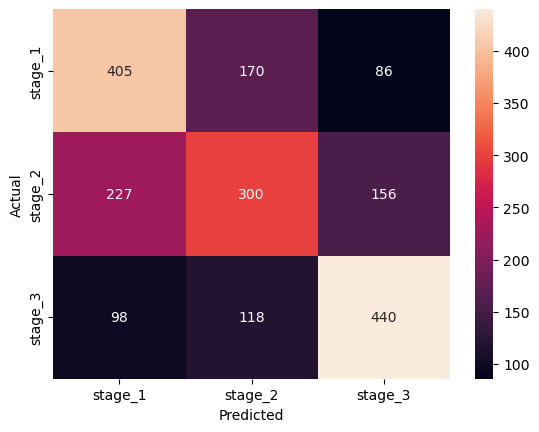

In [26]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train KNN classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=15, weights = 'distance', algorithm = 'brute')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, weights='distance')

### Evaluate KNN model

In [28]:
y_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy is : {round(knn_accuracy*100,2)}%")

KNN Accuracy is : 86.95%


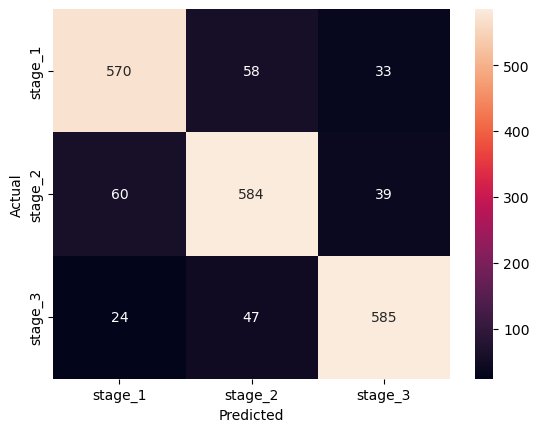

In [29]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train Random Forest classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [30]:
rf = RandomForestClassifier(n_estimators=45, max_depth=10, min_samples_split=3, max_features = 'log2', random_state=SEED)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=45, random_state=645)

### Evaluate Random Forest model

In [31]:
y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"RandFor Accuracy is : {round(rf_accuracy*100,2)}%")

RandFor Accuracy is : 89.65%


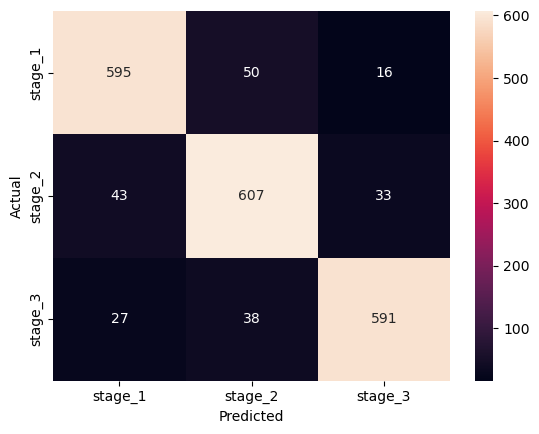

In [32]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train Support Vector Classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [33]:
svc = SVC(kernel='poly', C=4, degree=4, class_weight='balanced', random_state=SEED)
svc.fit(x_train, y_train)

SVC(C=4, class_weight='balanced', degree=4, kernel='poly', random_state=645)

### Evaluate Support Vector Classifier model

In [34]:
y_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy is : {round(svc_accuracy*100,2)}%")

SVC Accuracy is : 81.55%


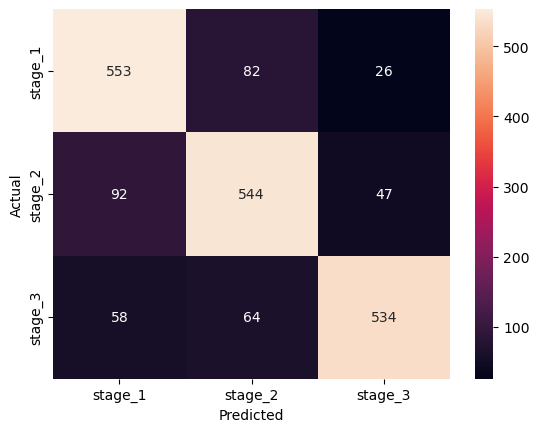

In [35]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Display bar chart comparison of accuracy for all 4 models

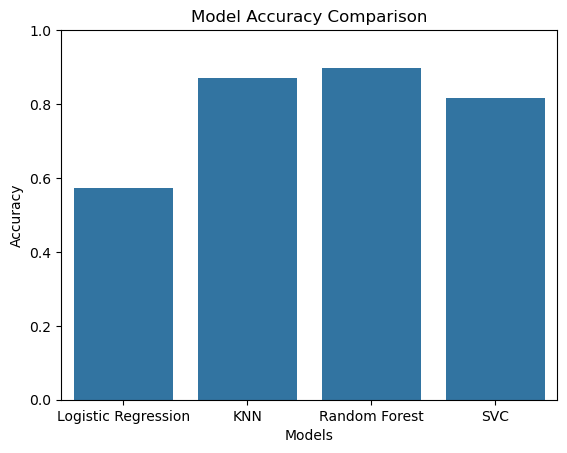

In [36]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']
accuracy_scores = [lr_accuracy, knn_accuracy, rf_accuracy, svc_accuracy]

sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()